<a href="https://colab.research.google.com/github/tgarnier067/Advanced-ML/blob/main/Data_collection_Photos_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import of the training data

from google.colab import files
uploaded = files.upload()

# Import of moduls

!pip install wikidata --quiet

import matplotlib.pyplot as plt
import pandas as pd
from wikidata.client import Client

from tqdm.auto import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the data
train_df = pd.read_csv('[MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv', sep='\t')

Saving [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv to [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv


In [2]:
def extract_entity_id(url):
    return url.strip().split("/")[-1]

In [3]:
def get_claims(wikidata_url):
  # Extract the id of the item
    entity_id = extract_entity_id(wikidata_url)

    # Extract information of the item
    client = Client()
    item = client.get(entity_id, load=True)

    # Extract the claims of the item
    claims = item.data.get("claims", {})

    return claims

In [4]:
wikidata_url = train_df.iloc[0,0]
claims = get_claims(wikidata_url)

unicode_statements = claims.get("P18", {})

for statement in unicode_statements:
  mainsnak = statement.get("mainsnak", {})
  datavalue = mainsnak.get("datavalue", {})
  value = datavalue.get("value")
  if value:
    print(value)

Retrato Oficial Presidente Piñera 2018.jpg
Sebastián Piñera en La Moneda 2022 (13).jpg


In [5]:
def get_sitelinks(wikidata_url):
  # Extract the id of the item
    entity_id = extract_entity_id(wikidata_url)

    # Extract information of the item
    client = Client()
    item = client.get(entity_id, load=True)

    # Extract the claims of the item
    sitelinks = item.data.get("sitelinks", {})

    return sitelinks

def get_en_wikipedia_url(wikidata_url):
  sitelinks = get_sitelinks(wikidata_url)
  enwiki = sitelinks.get("enwiki")
  return(enwiki.get("url"))

get_en_wikipedia_url(wikidata_url)

'https://en.wikipedia.org/wiki/Sebasti%C3%A1n_Pi%C3%B1era'

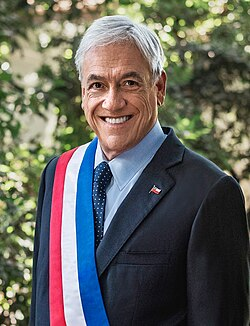

In [7]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

def get_wikipedia_image(wikidata_url):

    wikipedia_url = get_en_wikipedia_url(wikidata_url)

    response = requests.get(wikipedia_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        infobox = soup.find('table', {'class': 'infobox'})
        if infobox:
            img_tag = infobox.find('img')
            if img_tag:
                img_url = 'https:' + img_tag['src']
                response = requests.get(img_url)
                img = Image.open(BytesIO(response.content))
                return img
    return None

#Test
get_wikipedia_image(wikidata_url)

In [8]:
# Test on a subset of the dataframe

# Definition of wich rows do we want to extract the image
subset = range(0,2)

# Initialization of the new variable
train_df['image'] = None

# Extraction of the sub dataframe
train_df_test = train_df.iloc[0:2]

# Extraction of the images to the sub dataframe
train_df_test['image'] = train_df_test['item'].apply(lambda x: get_wikipedia_image(x))

# Visualisation
train_df_test

<ipython-input-8-32b8d01e561e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_test['image'] = train_df_test['item'].apply(lambda x: get_wikipedia_image(x))


item                name  \
0    http://www.wikidata.org/entity/Q306    Sebastián Piñera   
1  http://www.wikidata.org/entity/Q12735  John Amos Comenius   

                                         description    type  category  \
0    Chilean entrepreneur and politician (1949–2024)  entity  politics   
1  Czech teacher, educator, philosopher and write...  entity  politics   

  subcategory                    label  \
0  politician       cultural exclusive   
1  politician  cultural representative   

                                               image  
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...

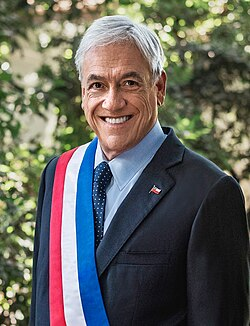

In [9]:
# Visualisation of a specific image :

train_df_test['image'][0]